In [1]:
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import keras
from keras.applications.imagenet_utils import decode_predictions

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

In [0]:
from keras.utils import np_utils
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [5]:
pip install image-classifiers

In [6]:
pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-vs3ekesy
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-vs3ekesy
  Running command git submodule update --init --recursive -q
  Stored in directory: /tmp/pip-ephem-wheel-cache-6m47aivb/wheels/de/2b/fd/29a6d33edb8c28bc7d94e95ea1d39c9a218ac500a3cfb1b197
Successfully built image-classifiers


## Importing ResNet Weights

In [7]:
from classification_models.resnet import ResNet18, preprocess_input

model = ResNet18((224, 224, 3), weights='imagenet')

W0708 17:06:33.100339 140248669726592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0708 17:06:33.131122 140248669726592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0708 17:06:33.132539 140248669726592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0708 17:06:33.136207 140248669726592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0708 17:06:33.141523 140248

A local file was found, but it seems to be incomplete or outdated because the md5 file hash does not match the original value of 64da73012bb70e16c901316c201d9803 so we will re-download the data.
46981120/46977688 [==============================] - 2s 0us/step


In [0]:
n_classes = 10
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

## Include_top = False - To freeze the last two layers.

## Bringing down to 10 channels using 1x1 so to use for GAP.

In [9]:
from keras.layers import Reshape, Activation, Conv2D, GlobalAveragePooling2D
from keras.models import Model
resnetmodel = ResNet18(input_shape=(32,32,3),weights="imagenet",include_top=False)
layer = Conv2D(n_classes,(1,1),strides=(1,1), padding="same", name = "conv1", use_bias=False)(resnetmodel.output)
gaplayer = GlobalAveragePooling2D()(layer)
output = Activation("softmax")(gaplayer)

model = Model(input=[resnetmodel.input],outputs=[output])

A local file was found, but it seems to be incomplete or outdated because the md5 file hash does not match the original value of 318e3ac0cd98d51e917526c9f62f0b50 so we will re-download the data.
44924928/44920640 [==============================] - 2s 0us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=[<tf.Tenso...)`
  


In [10]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 32, 32, 3)    9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_19 (ZeroPadding2 (None, 38, 38, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 16, 16, 64)   9408        zero_padding2d_19[0][0]          
__________________________________________________________________________________________________
bn0 (Batch

In [11]:
model.compile(optimizer="SGD",loss="categorical_crossentropy",metrics=['accuracy'])

W0708 17:06:47.727190 140248669726592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
# Defining checkpoints
from keras.callbacks import ModelCheckpoint
filepath="/content/gdrive/My Drive/Raajesh-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [0]:
import time
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

In [0]:
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 5, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks=callbacks_list)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=5)`
  del sys.path[0]
W0702 13:01:22.487548 140188588828544 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is depreca

Epoch 1/5
390/390 [==============================] - 46s 118ms/step - loss: 1.1931 - acc: 0.5891 - val_loss: 0.9150 - val_acc: 0.6868

Epoch 00001: val_acc improved from -inf to 0.68680, saving model to /content/gdrive/My Drive/Raajesh-01-0.69.hdf5
Epoch 2/5
390/390 [==============================] - 41s 105ms/step - loss: 0.7441 - acc: 0.7413 - val_loss: 0.7731 - val_acc: 0.7319

Epoch 00002: val_acc improved from 0.68680 to 0.73190, saving model to /content/gdrive/My Drive/Raajesh-02-0.73.hdf5
Epoch 3/5
390/390 [==============================] - 41s 104ms/step - loss: 0.5875 - acc: 0.7955 - val_loss: 0.7300 - val_acc: 0.7507

Epoch 00003: val_acc improved from 0.73190 to 0.75070, saving model to /content/gdrive/My Drive/Raajesh-03-0.75.hdf5
Epoch 4/5
390/390 [==============================] - 41s 104ms/step - loss: 0.4714 - acc: 0.8361 - val_loss: 0.7351 - val_acc: 0.7567

Epoch 00004: val_acc improved from 0.75070 to 0.75670, saving model to /content/gdrive/My Drive/Raajesh-04-0.76.

In [0]:
model.load_weights('/content/gdrive/My Drive/Raajesh-05-0.77.hdf5')

In [0]:
validation_data = datagen.flow(test_features, test_labels,batch_size=128,shuffle=False)

In [0]:
Y_pred = model.predict_generator(validation_data, steps=np.ceil(test_features.shape[0]/128), verbose=0)
y_pred = np.argmax(Y_pred, axis=1)

In [0]:
test_labels = np.argmax(test_labels, axis=1)

In [0]:
incorrect = np.nonzero(y_pred!=test_labels)

In [0]:
arincorr = incorrect[0][0:50]

## PRINTING 50 MISCLASSIFIED IMAGES WITH RESPECTIVE TITLES

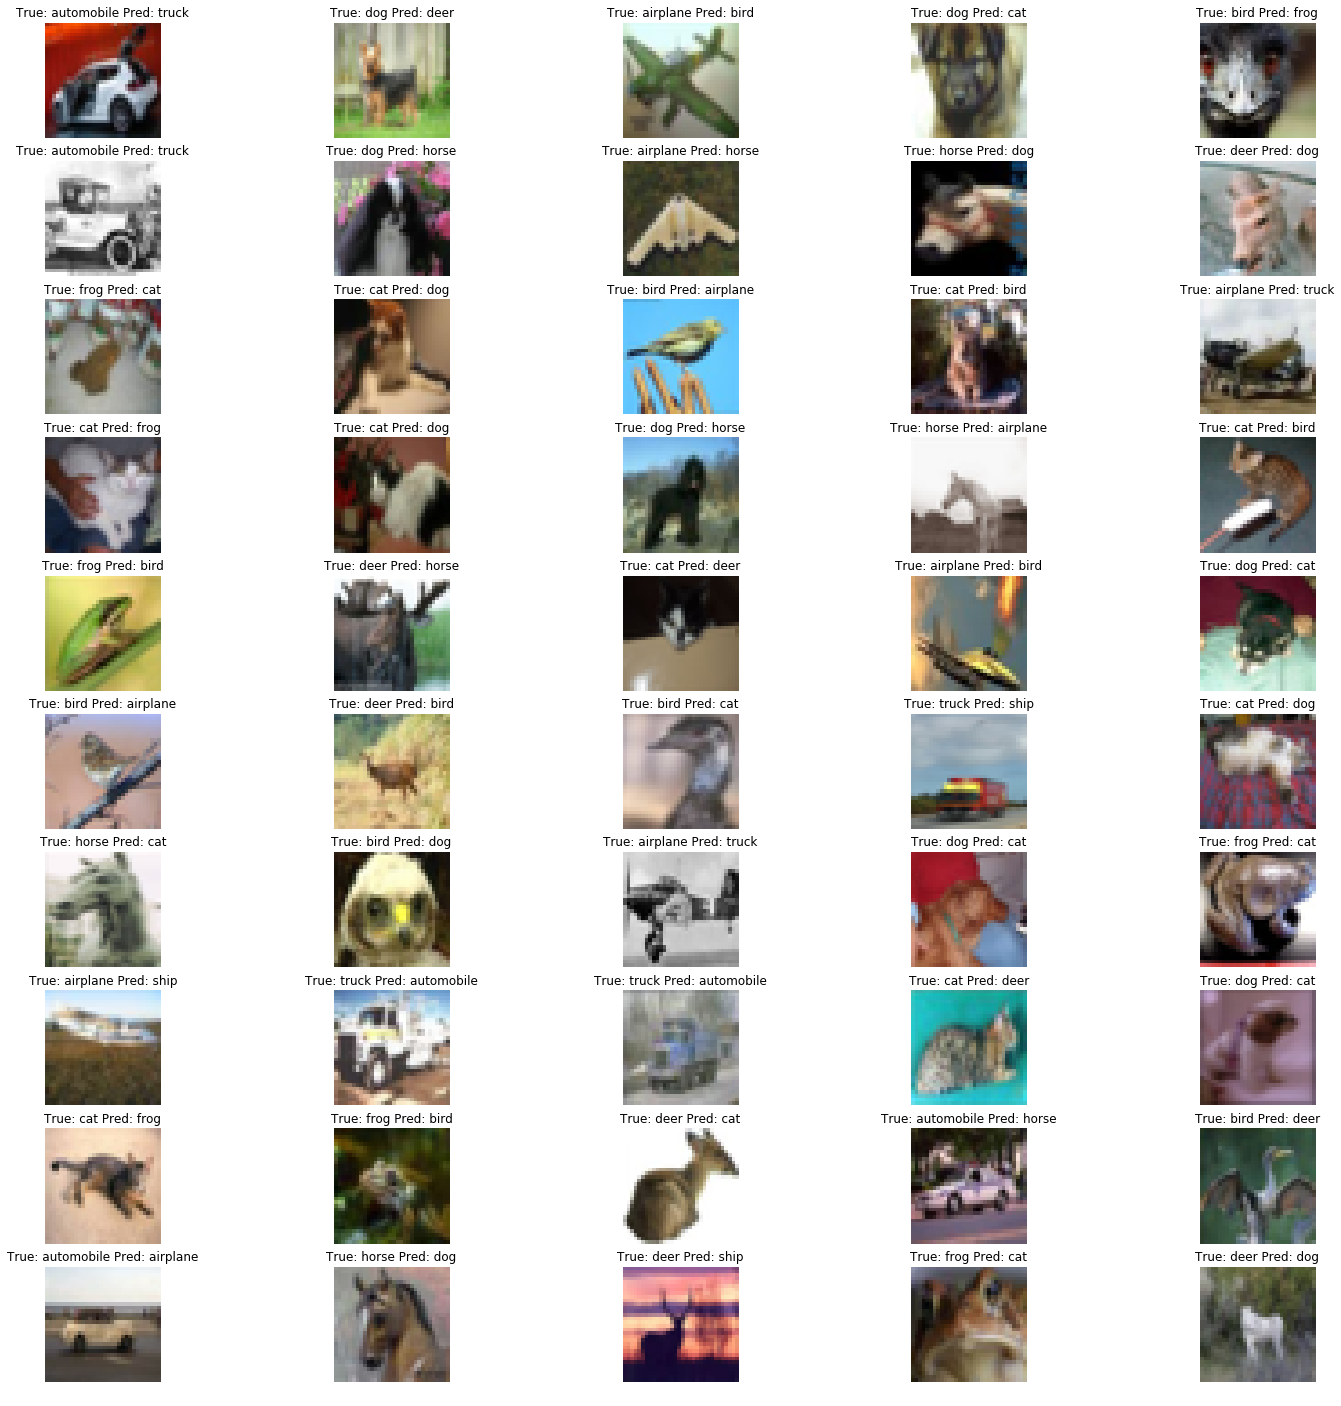

In [33]:
import matplotlib.pyplot as plt
import numpy as np

#plt.figure(0)
plt.figure(figsize = (25,25)) 
plots = []
count = 0
for i in range(10):
    for j in range(5):
        ax = plt.subplot2grid((10,5), (i,j))
        plt.imshow(test_features[arincorr[count]].reshape(32,32,3),cmap='gray',interpolation='none')
        true = int(test_labels[arincorr[count]])
        pred = int(y_pred[arincorr[count]])
        plt.title("True: "+str(class_names[true])+" Pred: " +str(class_names[pred]))
        #plt.title("Predicted {}, Class {}".format(y_pred[arincorr[count]], test_labels[arincorr[count]]))
        count = count+1
        plt.axis('off')
plt.show()

In [0]:
(Train_features, Train_labels),(Test_features,Test_labels) = cifar10.load_data()

In [0]:
Train_features = Train_features.astype('float32')/255
Test_features = Test_features.astype('float32')/255

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys

## SHOWING SAME 50 MISCLASSIFIED IMAGES WITH GRADCAM

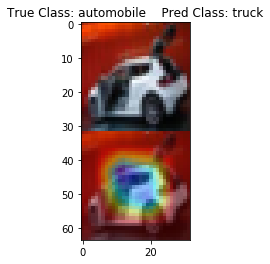

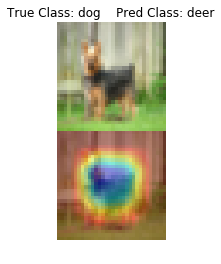

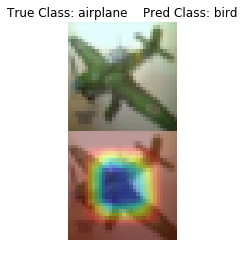

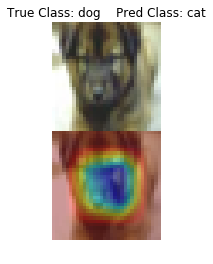

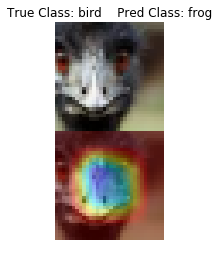

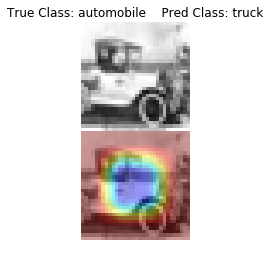

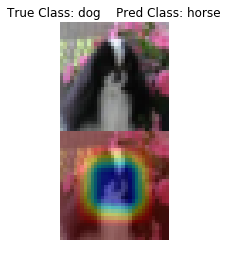

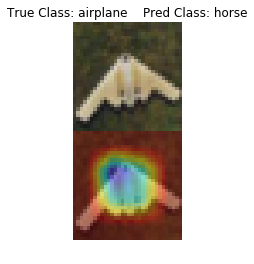

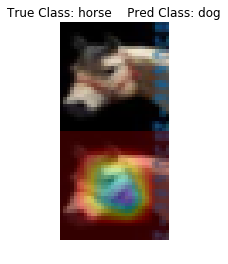

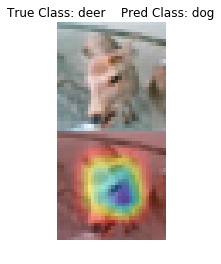

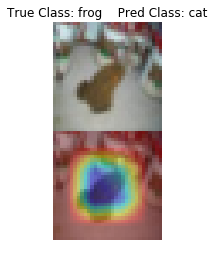

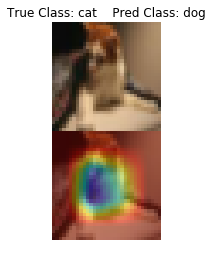

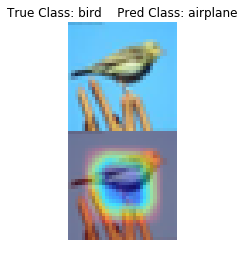

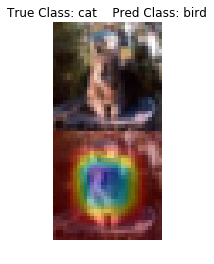

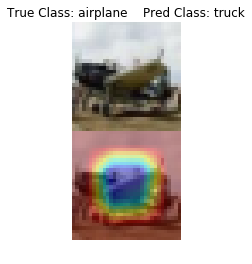

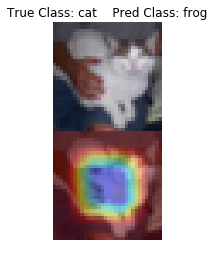

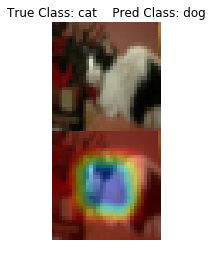

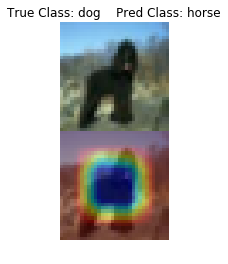

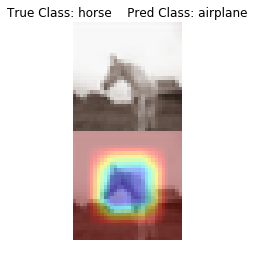

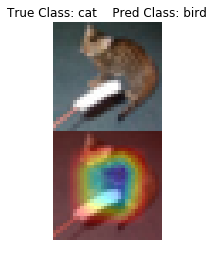

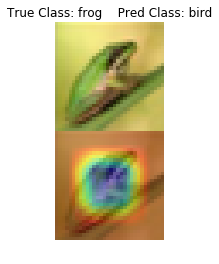

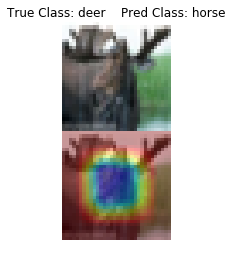

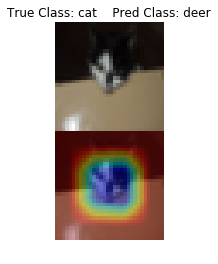

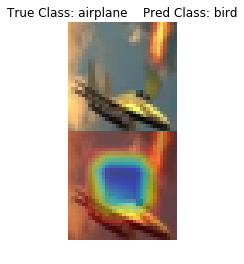

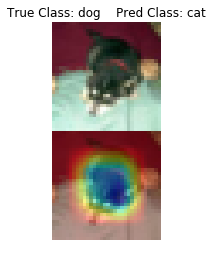

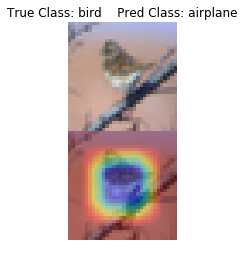

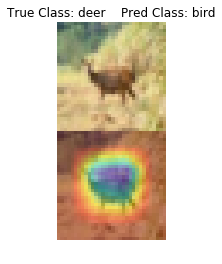

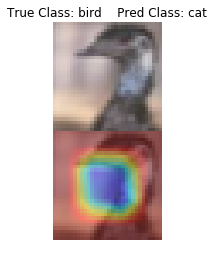

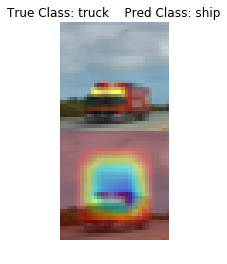

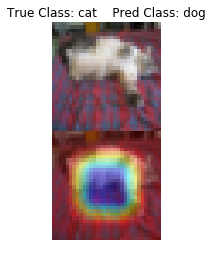

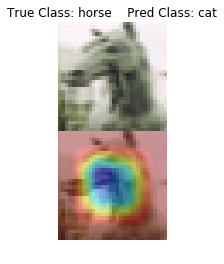

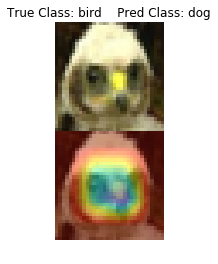

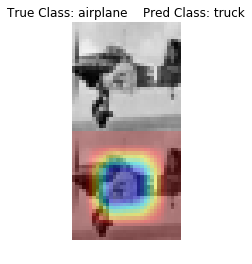

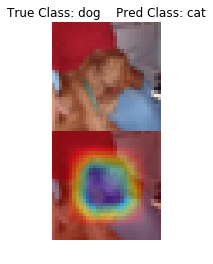

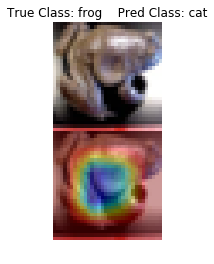

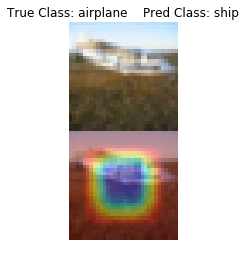

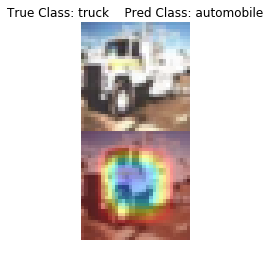

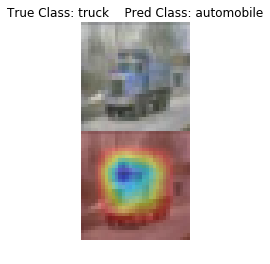

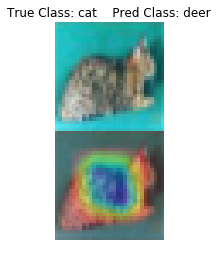

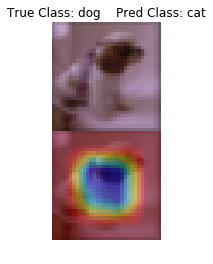

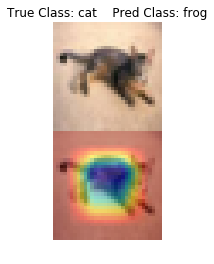

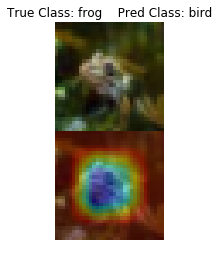

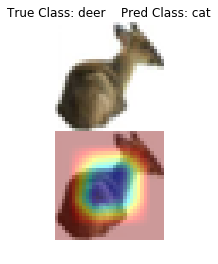

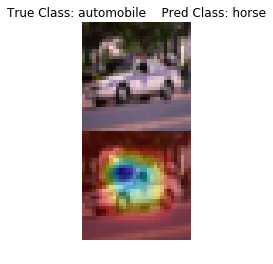

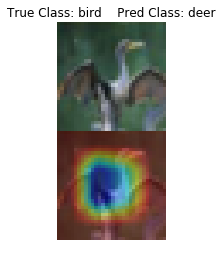

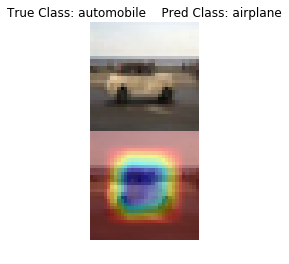

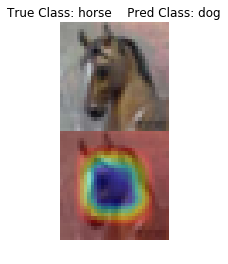

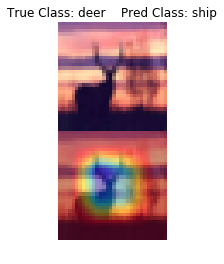

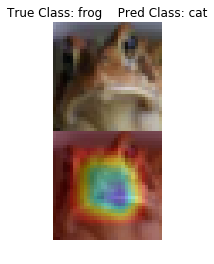

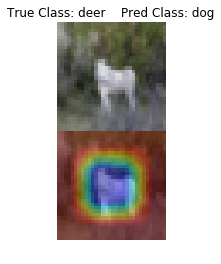

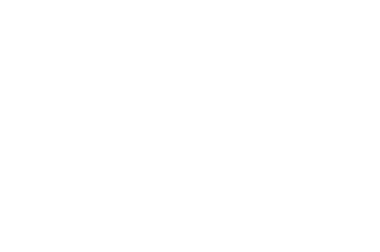

In [41]:
for n in arincorr:
  gradcam(n)

In [0]:
def gradcam(image_number):
  (train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
  test_features = test_features.astype('float32')/255
  test_labels = np_utils.to_categorical(test_labels, num_classes)  
  img = test_features[image_number]
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  #x = preprocess_input(x)  
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("zero_padding2d_33") 
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(192):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]    
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)  
  (train_features, train_labels), (test_features, test_labels) = cifar10.load_data()  
  img = test_features[image_number]
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  final = np.concatenate((img, superimposed_img), axis = 0)
  #from google.colab.patches import cv2_imshow
  #img = cv2.resize(img,(128,128))
  #superimposed_img = cv2.resize(superimposed_img,(128,128))
  #cv2_imshow(img)
  #cv2_imshow(superimposed_img)
  #cv2.waitKey(0)
  true = int(Test_labels[image_number])
  pred = int(y_pred[image_number])
  plt.title("True Class: " + str(class_names[true])+"    Pred Class: " + str(class_names[pred]))
  plt.imshow(final)
  plt.show()
  #plt.imshow(img)
  #plt.show()
  #plt.imshow(superimposed_img)
  plt.axis('off')
  #plt.show()
  #cv2.waitKey(0)